In [1]:
import matplotlib.pyplot as plt
from matplotlib.backend_bases import RendererBase
from scipy import signal
from scipy.io import wavfile
#import soundfile as sf
import os
import numpy as np
from PIL import Image
from scipy.fftpack import fft

%matplotlib inline

In [2]:
audio_path = './input/train/audio/'
pict_Path = './input/picts/train/'
test_pict_Path = './input/picts/test/'
test_audio_path = './input/test/audio/'
samples = []

os.system('rm -rf ./input/picts/test')
os.system('rm -rf ./input/picts/train')
os.mkdir('./input/picts/test')
os.mkdir('./input/picts/train')

In [3]:
subFolderList = []
for x in os.listdir(audio_path):
    if os.path.isdir(audio_path + '/' + x):
        subFolderList.append(x)

In [4]:
if not os.path.exists(pict_Path):
    os.makedirs(pict_Path)

if not os.path.exists(test_pict_Path):
    os.makedirs(test_pict_Path)


labels_to_keep = ['yes', 'no', 'up', 'down', 'left',
                  'right', 'on', 'off', 'stop', 'go', 'silence', 'unknown']

for f in labels_to_keep:
    os.mkdir(pict_Path + f)
    
for f in labels_to_keep:
    os.mkdir(test_pict_Path + f)

In [5]:
sample_audio = []
total = 0
for x in subFolderList:
    
    # get all the wave files
    all_files = [y for y in os.listdir(audio_path + x) if '.wav' in y]
    total += len(all_files)
    # collect the first file from each dir
    sample_audio.append(audio_path  + x + '/'+ all_files[0])
    
    # show file counts
    print('count: %d : %s' % (len(all_files), x ))
print(total)

count: 1733 : tree
count: 2357 : five
count: 1746 : dog
count: 1742 : happy
count: 2372 : go
count: 2367 : right
count: 6 : _background_noise_
count: 1746 : marvin
count: 2375 : no
count: 2352 : eight
count: 2370 : one
count: 1713 : bed
count: 1731 : bird
count: 2364 : nine
count: 1745 : wow
count: 2373 : two
count: 2367 : on
count: 2380 : stop
count: 1750 : house
count: 2353 : left
count: 2377 : seven
count: 2356 : three
count: 1734 : sheila
count: 2376 : zero
count: 1733 : cat
count: 2372 : four
count: 2357 : off
count: 2377 : yes
count: 2359 : down
count: 2375 : up
count: 2369 : six
64727


In [6]:
sample_audio[0]

'./input/train/audio/tree/09ddc105_nohash_0.wav'

In [7]:
def log_specgram(audio, sample_rate, window_size=20,
                 step_size=10, eps=1e-10):
    nperseg = int(round(window_size * sample_rate / 1e3))
    noverlap = int(round(step_size * sample_rate / 1e3))
    freqs, _, spec = signal.spectrogram(audio,
                                    fs=sample_rate,
                                    window='hann',
                                    nperseg=nperseg,
                                    noverlap=noverlap,
                                    detrend=False)
    return freqs, np.log(spec.T.astype(np.float32) + eps)

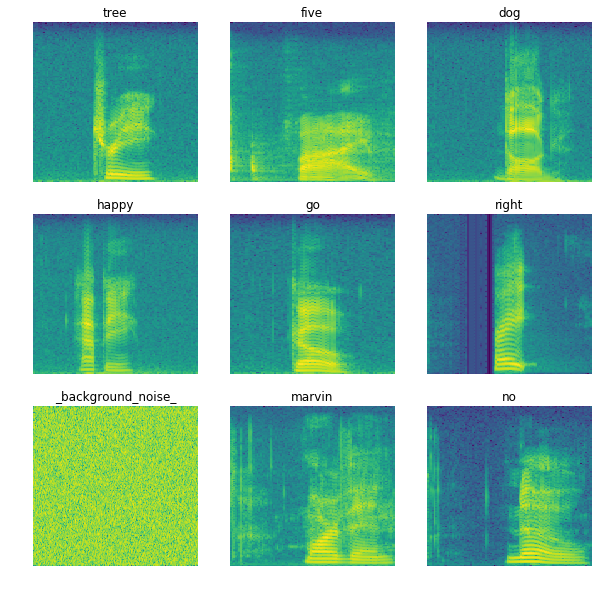

In [8]:
fig = plt.figure(figsize=(10,10))

# for each of the samples
for i, filepath in enumerate(sample_audio[:9]):
    # Make subplots
    plt.subplot(3,3,i+1)
    
    # pull the labels
    label = filepath.split('/')[-2]
    plt.title(label)
    
    # create spectogram
    samplerate, test_sound  = wavfile.read(filepath)
    _, spectrogram = log_specgram(test_sound, samplerate)
    
    plt.imshow(spectrogram.T, aspect='auto', origin='lower')
    plt.axis('off')

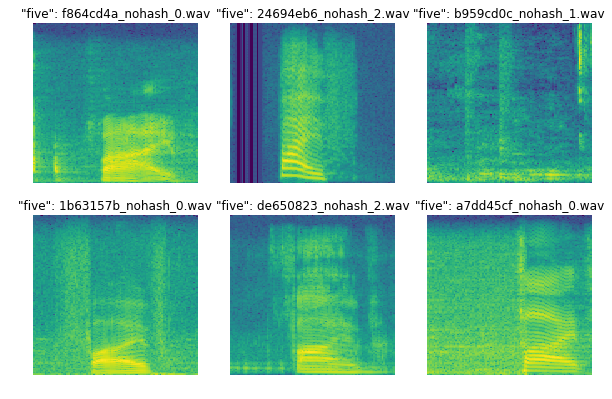

In [9]:
five_samples = [audio_path + 'five/' + y for y in os.listdir(audio_path + 'five/')[:6]]

fig = plt.figure(figsize=(10,10))

for i, filepath in enumerate(five_samples):
    # Make subplots
    plt.subplot(3,3,i+1)
    
    # pull the labels
    label = filepath.split('/')[-1]
    plt.title('"five": '+label)
    
    # create spectogram
    # create spectogram
    samplerate, test_sound  = wavfile.read(filepath)
    _, spectrogram = log_specgram(test_sound, samplerate)
    
    plt.imshow(spectrogram.T, aspect='auto', origin='lower')
    plt.axis('off')

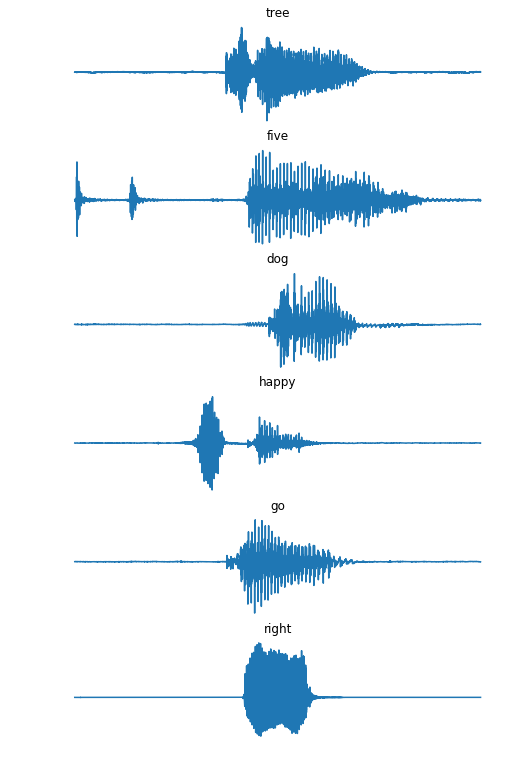

In [10]:
fig = plt.figure(figsize=(8,20))
for i, filepath in enumerate(sample_audio[:6]):
    plt.subplot(9,1,i+1)
    samplerate, test_sound  = wavfile.read(filepath)
    plt.title(filepath.split('/')[-2])
    plt.axis('off')
    plt.plot(test_sound)

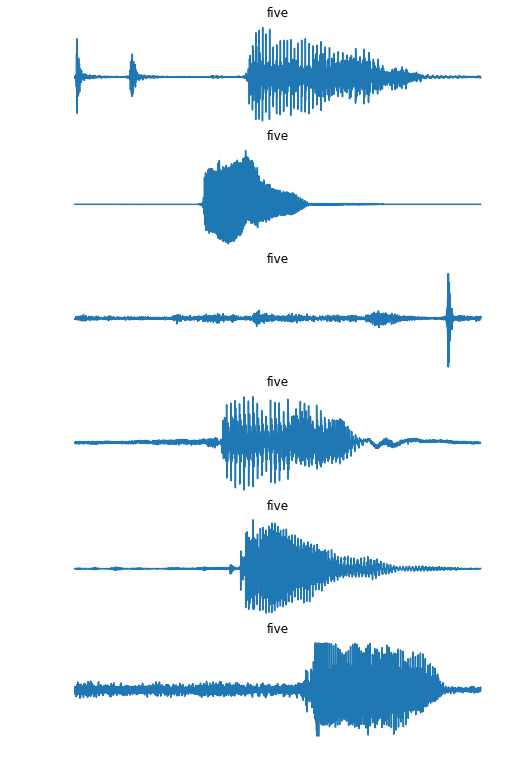

In [11]:
fig = plt.figure(figsize=(8,20))
for i, filepath in enumerate(five_samples):
    plt.subplot(9,1,i+1)
    samplerate, test_sound = wavfile.read(filepath)
    plt.title(filepath.split('/')[-2])
    plt.axis('off')
    plt.plot(test_sound)

In [12]:
def wav2img(wav_path, targetdir='', figsize=(4,4)):
    """
    takes in wave file path
    and the fig size. Default 4,4 will make images 288 x 288
    """

    fig = plt.figure(figsize=figsize)    
    # use soundfile library to read in the wave files
    samplerate, test_sound  = wavfile.read(wav_path)
    _, spectrogram = log_specgram(test_sound, samplerate)
    
    ## create output path
    output_file = wav_path.split('/')[-1].split('.wav')[0]
    output_file = targetdir +'/'+ output_file
    #plt.imshow(spectrogram.T, aspect='auto', origin='lower')
    plt.imsave('%s.png' % output_file, spectrogram)
    plt.close()

In [13]:
def wav2img_waveform(wav_path, targetdir='', figsize=(4,4)):
    samplerate,test_sound  = wavfile.read(sample_audio[0])
    fig = plt.figure(figsize=figsize)
    plt.plot(test_sound)
    plt.axis('off')
    output_file = wav_path.split('/')[-1].split('.wav')[0]
    output_file = targetdir +'/'+ output_file
    plt.savefig('%s.png' % output_file)
    plt.close()

In [14]:
subFolderList.remove('_background_noise_')

In [15]:
subFolderList

['tree',
 'five',
 'dog',
 'happy',
 'go',
 'right',
 'marvin',
 'no',
 'eight',
 'one',
 'bed',
 'bird',
 'nine',
 'wow',
 'two',
 'on',
 'stop',
 'house',
 'left',
 'seven',
 'three',
 'sheila',
 'zero',
 'cat',
 'four',
 'off',
 'yes',
 'down',
 'up',
 'six']

In [16]:
labels_to_keep = ['yes', 'no', 'up', 'down', 'left',
                  'right', 'on', 'off', 'stop', 'go',]

In [17]:
for i, x in enumerate(subFolderList):
    if x in labels_to_keep:
        print(i, ':', x)
        # get all the wave files
        all_files = [y for y in os.listdir(audio_path + x) if '.wav' in y]
        for file in all_files[:100]:
            wav2img(audio_path + x + '/' + file, pict_Path + x)
    else:
        all_files = [y for y in os.listdir(audio_path + x) if '.wav' in y]
        for file in all_files[:16]:
            wav2img(audio_path + x + '/' + file, "./input/picts/train/unknown")

4 : go
5 : right
7 : no
15 : on
16 : stop
18 : left
25 : off
26 : yes
27 : down
28 : up


In [19]:
def adjust_image(data):
    # Reshaped to [batch, height, width, channels].
    imgs = tf.reshape(data, [-1, 28, 28, 1])
    # Adjust image size to that in Inception-v3 input.
    imgs = tf.image.resize_images(imgs, (96, 96))
    # Convert to RGB image.
    imgs = tf.image.grayscale_to_rgb(imgs)
    return imgs


def mobilenet_model_fn(features, labels, mode):
    # Load Inception-v3 model.
    module = hub.Module("https://tfhub.dev/google/imagenet/mobilenet_v2_035_96/feature_vector/2")
    input_layer = adjust_image(features["pixels"])
    outputs = module(input_layer)

    logits = tf.layers.dense(inputs=outputs, units=10)

    predictions = {
        # Generate predictions (for PREDICT and EVAL mode)
        "classes": tf.argmax(input=logits, axis=1),
        # Add `softmax_tensor` to the graph. It is used for PREDICT and by the
        # `logging_hook`.
        "probabilities": tf.nn.softmax(logits, name="softmax_tensor")
    }

    if mode == tf.estimator.ModeKeys.PREDICT:
        return tf.estimator.EstimatorSpec(mode=mode, predictions=predictions)

    # Calculate Loss (for both TRAIN and EVAL modes)
    loss = tf.losses.sparse_softmax_cross_entropy(labels=labels, logits=logits)

    # Configure the Training Op (for TRAIN mode)
    if mode == tf.estimator.ModeKeys.TRAIN:
        optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
        train_op = optimizer.minimize(
            loss=loss,
            global_step=tf.train.get_global_step())
        return tf.estimator.EstimatorSpec(mode=mode, loss=loss, train_op=train_op)

    # Add evaluation metrics (for EVAL mode)
    eval_metric_ops = {
        "accuracy": tf.metrics.accuracy(
            labels=labels, predictions=predictions["classes"])}
    return tf.estimator.EstimatorSpec(
        mode=mode, loss=loss, eval_metric_ops=eval_metric_ops)

In [20]:
def construct_feature_columns():
  # There are 784 pixels in each image.
  return set([tf.feature_column.numeric_column('pixels', shape=784)])

In [21]:
def create_training_input_fn(features, labels, batch_size, num_epochs=None, shuffle=True):
  """A custom input_fn for sending MNIST data to the estimator for training.

  Args:
    features: The training features.
    labels: The training labels.
    batch_size: Batch size to use during training.

  Returns:
    A function that returns batches of training features and labels during
    training.
  """
  def _input_fn(num_epochs=None, shuffle=True):
    # Input pipelines are reset with each call to .train(). To ensure model
    # gets a good sampling of data, even when number of steps is small, we 
    # shuffle all the data before creating the Dataset object
    idx = np.random.permutation(features.index)
    raw_features = {"pixels":features.reindex(idx)}
    raw_targets = np.array(labels[idx])
   
    ds = Dataset.from_tensor_slices((raw_features,raw_targets)) # warning: 2GB limit
    ds = ds.batch(batch_size).repeat(num_epochs)
    
    if shuffle:
      ds = ds.shuffle(10000)
    
    # Return the next batch of data.
    feature_batch, label_batch = ds.make_one_shot_iterator().get_next()
    return feature_batch, label_batch

  return _input_fn

In [22]:
def create_predict_input_fn(features, labels, batch_size):
  """A custom input_fn for sending mnist data to the estimator for predictions.

  Args:
    features: The features to base predictions on.
    labels: The labels of the prediction examples.

  Returns:
    A function that returns features and labels for predictions.
  """
  def _input_fn():
    raw_features = {"pixels": features.values}
    raw_targets = np.array(labels)
    
    ds = Dataset.from_tensor_slices((raw_features, raw_targets)) # warning: 2GB limit
    ds = ds.batch(batch_size)
    
        
    # Return the next batch of data.
    feature_batch, label_batch = ds.make_one_shot_iterator().get_next()
    return feature_batch, label_batch

  return _input_fn

In [ ]:
def train_hub_classification_model(
    learning_rate,
    steps,
    batch_size,
    hidden_units,
    training_examples,
    training_targets,
    validation_examples,
    validation_targets):

    periods = 10

    steps_per_period = steps / periods  

    predict_training_input_fn = create_predict_input_fn(training_examples, training_targets, batch_size)
  
    predict_validation_input_fn = create_predict_input_fn(validation_examples, validation_targets, batch_size)
  
    training_input_fn = create_training_input_fn(training_examples, training_targets, batch_size)
  
    predict_training_input_fn = create_predict_input_fn(training_examples, training_targets, batch_size)
    
    predict_validation_input_fn = create_predict_input_fn(validation_examples, validation_targets, batch_size)

    training_input_fn = create_training_input_fn(training_examples, training_targets, batch_size)
  
    feature_columns = [tf.feature_column.numeric_column('pixels', shape=784)]

    my_optimizer = tf.train.AdagradOptimizer(learning_rate=learning_rate)
    
    my_optimizer = tf.contrib.estimator.clip_gradients_by_norm(my_optimizer, 5.0)
###############################################################
    classifier = tf.estimator.Estimator(
    model_fn=mobilenet_model_fn, model_dir="/tmp/transfer/3")
##############################################################################
    # Train the model, but do so inside a loop so that we can periodically assess
    # loss metrics.
    print("Training model...")
    print("LogLoss error (on validation data):")
    training_errors = []
    validation_errors = []
    for period in range (0, periods):
        classifier.train(
            input_fn=training_input_fn,
            steps=steps_per_period
        )
        training_predictions = list(classifier.predict(input_fn=predict_training_input_fn))
        training_probabilities = np.array([item['probabilities'] for item in training_predictions])
        training_pred_class_id = np.array([item['classes'] for item in training_predictions])
        training_pred_one_hot = tf.keras.utils.to_categorical(training_pred_class_id,10)

        validation_predictions = list(classifier.predict(input_fn=predict_validation_input_fn))
        validation_probabilities = np.array([item['probabilities'] for item in validation_predictions])    
        validation_pred_class_id = np.array([item['classes'] for item in validation_predictions])
        validation_pred_one_hot = tf.keras.utils.to_categorical(validation_pred_class_id,10)    

        # Compute training and validation errors.
        training_log_loss = metrics.log_loss(training_targets, training_pred_one_hot)
        validation_log_loss = metrics.log_loss(validation_targets, validation_pred_one_hot)
        # Occasionally print the current loss.
        print("  period %02d : %0.2f" % (period, validation_log_loss))
        # Add the loss metrics from this period to our list.
        training_errors.append(training_log_loss)
        validation_errors.append(validation_log_loss)
    print("Model training finished.")
    # Remove event files to save disk space.
    _ = map(os.remove, glob.glob(os.path.join(classifier.model_dir, 'events.out.tfevents*')))

    # Calculate final predictions (not probabilities, as above).
    final_predictions = classifier.predict(input_fn=predict_validation_input_fn)
    final_predictions = np.array([item['classes'] for item in final_predictions])


    accuracy = metrics.accuracy_score(validation_targets, final_predictions)
    print("Final accuracy (on validation data): %0.2f" % accuracy)

    # Output a graph of loss metrics over periods.
    plt.ylabel("LogLoss")
    plt.xlabel("Periods")
    plt.title("LogLoss vs. Periods")
    plt.plot(training_errors, label="training")
    plt.plot(validation_errors, label="validation")
    plt.legend()
    plt.show()

    # Output a plot of the confusion matrix.
    cm = metrics.confusion_matrix(validation_targets, final_predictions)
    # Normalize the confusion matrix by row (i.e by the number of samples
    # in each class).
    cm_normalized = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]
    ax = sns.heatmap(cm_normalized, cmap="bone_r")
    ax.set_aspect(1)
    plt.title("Confusion matrix")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")
    plt.show()

    return classifier

In [ ]:
classifier = train_hub_classification_model(
    learning_rate=1.5,
    steps=1000,
    batch_size=100,
    hidden_units=[100, 100],
    training_examples=training_examples,
    training_targets=training_targets,
    validation_examples=validation_examples,
    validation_targets=validation_targets)

In [ ]:
def my_test_input_fn(features, batch_size=1, shuffle=True, num_epochs=None):
    raw_features = {"pixels": features.values}
    ds = Dataset.from_tensor_slices((raw_features))
    ds = ds.batch(batch_size).repeat(num_epochs)
    if shuffle:
        ds = ds.shuffle(10000)
    features = ds.make_one_shot_iterator().get_next()
    return features

predict_test_input_fn = lambda: my_test_input_fn(
    test,
    num_epochs=1,
    shuffle=False)

test_predictions = classifier.predict(input_fn=predict_test_input_fn)
test_predictions = np.array([item['classes'] for item in test_predictions])

In [ ]:
my_submission = pd.DataFrame({'fname': test.index + 1, 'label': test_predictions})
# you could use any filename. We choose submission here
my_submission.to_csv('sub_voice_transfer.csv', index=False)